<a href="https://colab.research.google.com/github/datamongerbonny/Large-Data-Resources/blob/main/deforestation_teachable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas matplotlib scikit-learn rasterio geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 87.7 MB/s eta 0:00:00


In [34]:
import rasterio
import numpy as np

# Load the satellite image
with rasterio.open('/content/truecolor_Sentinel.tif') as src:
    image = src.read()

# Reshape the image to (width*height, bands)
height, width = image.shape[1], image.shape[2]
reshaped_image = image.reshape((height * width, image.shape[0])).transpose()

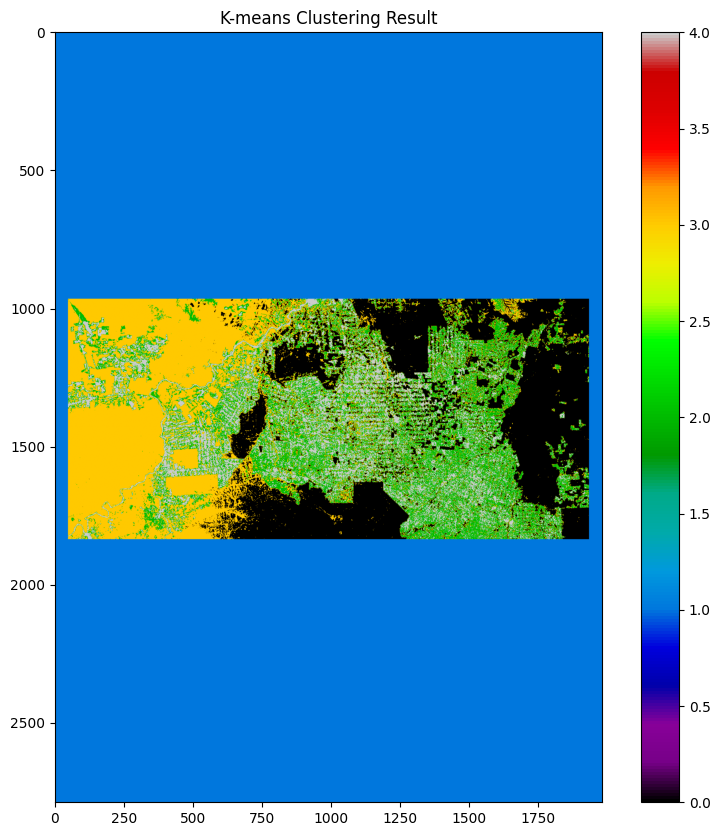

In [35]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the satellite image
with rasterio.open('/content/truecolor_Sentinel.tif') as src:
    image = src.read()  # This reads the data as (num_bands, height, width)

# Reshape the image to (num_bands, height * width)
num_bands, height, width = image.shape
reshaped_image = image.reshape(num_bands, -1).T  # Now the shape is (height * width, num_bands)

# Now that we are sure about the shape, let's normalize the data
reshaped_image = np.nan_to_num(reshaped_image)
reshaped_image = (reshaped_image - np.min(reshaped_image)) / (np.max(reshaped_image) - np.min(reshaped_image))

# Define the number of clusters
n_clusters = min(5, reshaped_image.shape[0])  # Ensure adequate samples
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model
kmeans.fit(reshaped_image)

# Get the labels and reshape back to original image dimensions
labels = kmeans.labels_.reshape(height, width)

# Visualize the results
plt.figure(figsize=(10, 10))
plt.imshow(labels, cmap='nipy_spectral')
plt.colorbar()
plt.title('K-means Clustering Result')
plt.show()

In [36]:
# Normalize data
reshaped_image = np.nan_to_num(reshaped_image)
reshaped_image = (reshaped_image - np.min(reshaped_image)) / (np.max(reshaped_image) - np.min(reshaped_image))

In [37]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 5  # Adjust based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(reshaped_image)

# Get the labels and reshape back to the original image dimensions
labels = kmeans.labels_.reshape(height, width)

In [38]:
print(reshaped_image.shape)

(5525009, 3)


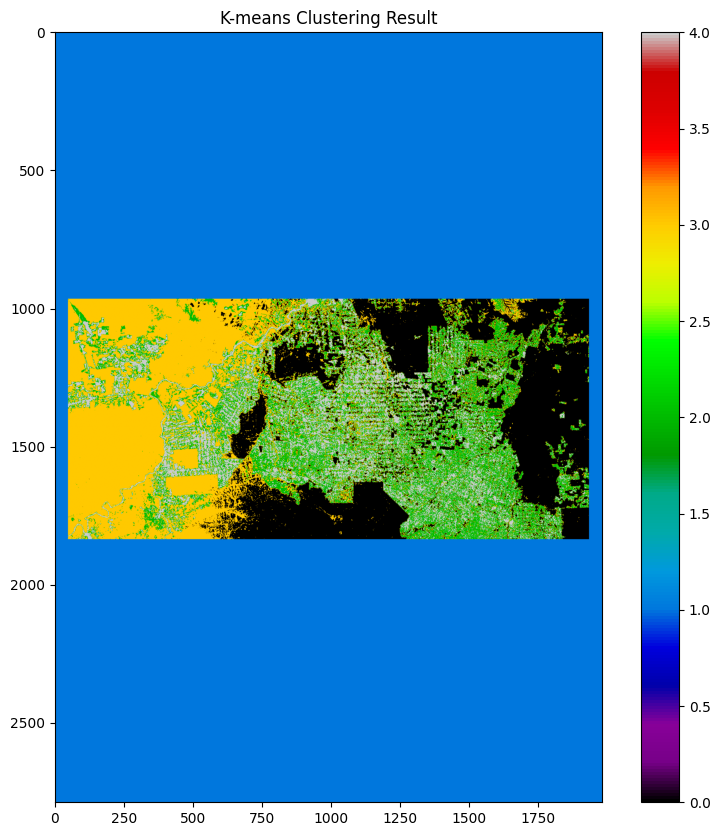

In [39]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the satellite image
with rasterio.open('/content/truecolor_Sentinel.tif') as src:
    image = src.read()  # This reads the data as (num_bands, height, width)

# Reshape the image to (num_bands, height * width)
num_bands, height, width = image.shape
reshaped_image = image.reshape(num_bands, -1).T  # Now the shape is (height * width, num_bands)

# Now that we are sure about the shape, let's normalize the data
reshaped_image = np.nan_to_num(reshaped_image)
reshaped_image = (reshaped_image - np.min(reshaped_image)) / (np.max(reshaped_image) - np.min(reshaped_image))

# Define the number of clusters
n_clusters = min(5, reshaped_image.shape[0])  # Ensure adequate samples
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model
kmeans.fit(reshaped_image)

# Get the labels and reshape back to original image dimensions
labels = kmeans.labels_.reshape(height, width)

# Visualize the results
plt.figure(figsize=(10, 10))
plt.imshow(labels, cmap='nipy_spectral')
plt.colorbar()
plt.title('K-means Clustering Result')
plt.show()

In [40]:
nan_count = np.isnan(reshaped_image).sum()
print(f'Number of NaN values: {nan_count}')

Number of NaN values: 0


In [41]:
reshaped_image = np.nan_to_num(reshaped_image)  # Replace NaNs with zeros
# or using mean
mean_value = np.nanmean(reshaped_image, axis=0)
reshaped_image = np.where(np.isnan(reshaped_image), mean_value, reshaped_image)

In [42]:
from sklearn.cluster import KMeans

# Assuming you have already prepared the reshaped_image and handled NaNs

n_clusters = 5  # Example number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(reshaped_image)

# Get the labels after fitting the model
labels = kmeans.labels_.reshape(height, width)

In [43]:
# Count the number of pixels in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_distribution = dict(zip(unique, counts))
print("Cluster distribution:", cluster_distribution)

Cluster distribution: {0: 496607, 1: 3881433, 2: 369858, 3: 541606, 4: 235505}


In [44]:
for cluster in range(n_clusters):
    cluster_pixels = reshaped_image[labels.flatten() == cluster]
    mean_values = cluster_pixels.mean(axis=0)
    print(f"Mean values for cluster {cluster}: {mean_values}")

Mean values for cluster 0: [0.11287379 0.19294202 0.22718594]
Mean values for cluster 1: [5.00588544e-09 1.30306524e-08 7.32974197e-09]
Mean values for cluster 2: [0.2814685  0.28373186 0.29634132]
Mean values for cluster 3: [0.15623725 0.24112487 0.28286551]
Mean values for cluster 4: [0.37563615 0.32835519 0.3317647 ]


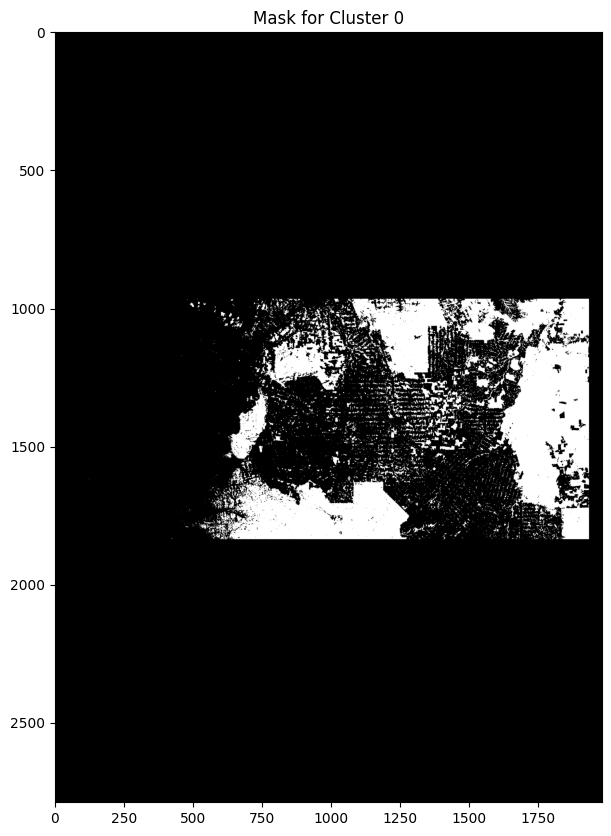

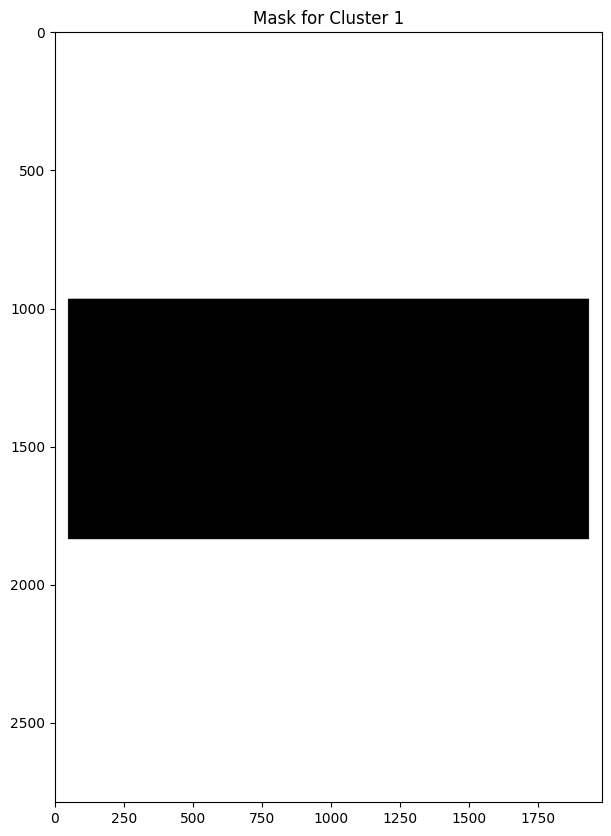

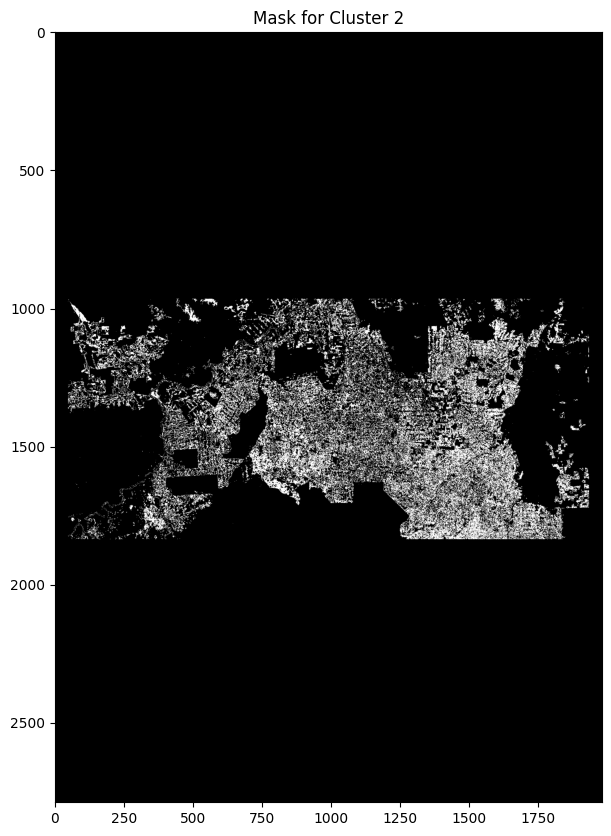

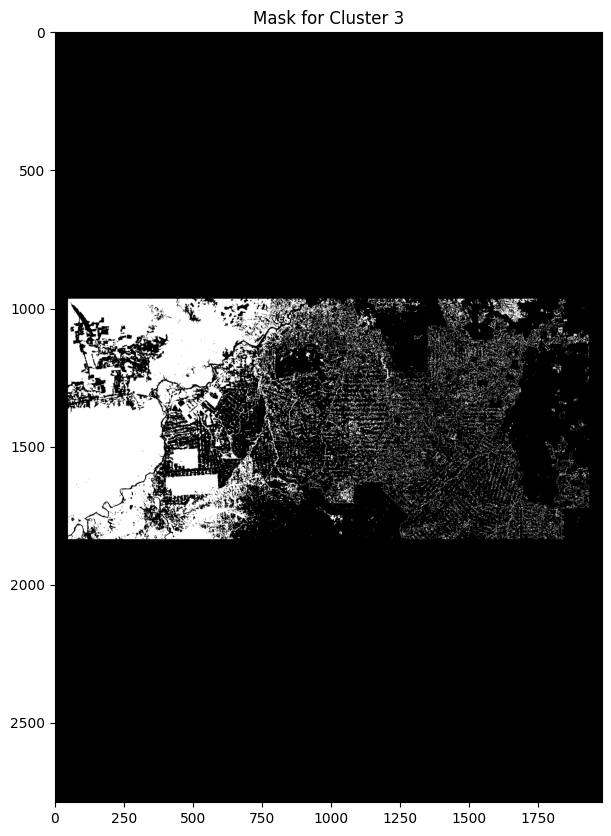

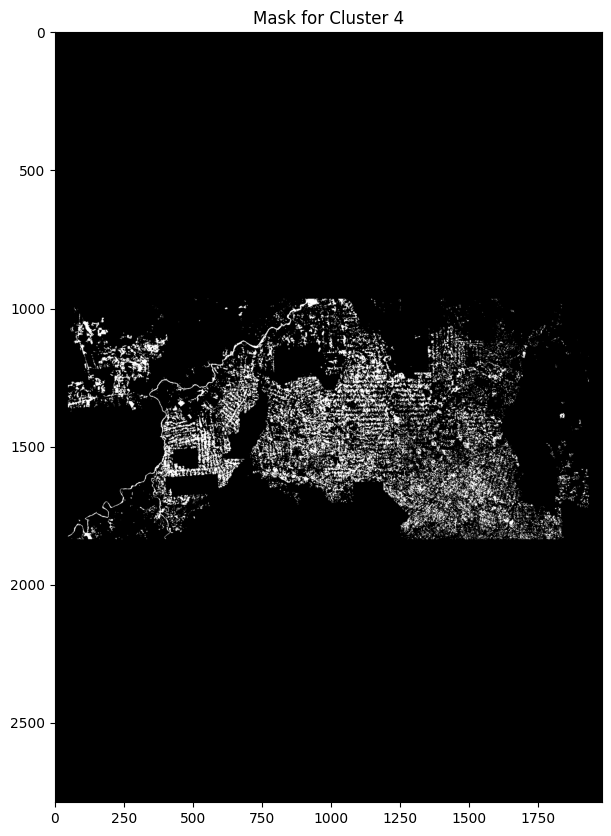

In [45]:
for cluster in range(n_clusters):
    mask = (labels == cluster)  # Create a mask for the current cluster
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    plt.title(f'Mask for Cluster {cluster}')
    plt.show()

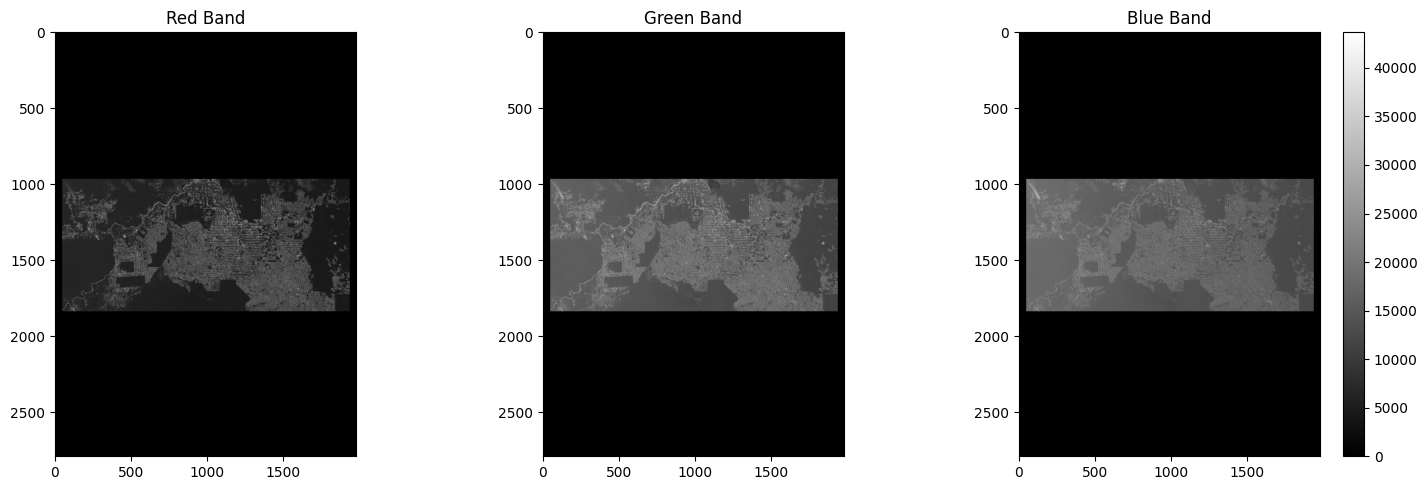

In [46]:
# Visualizing the original RGB bands
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Red Band')
plt.imshow(image[0], cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Green Band')
plt.imshow(image[1], cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Blue Band')
plt.imshow(image[2], cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.show()

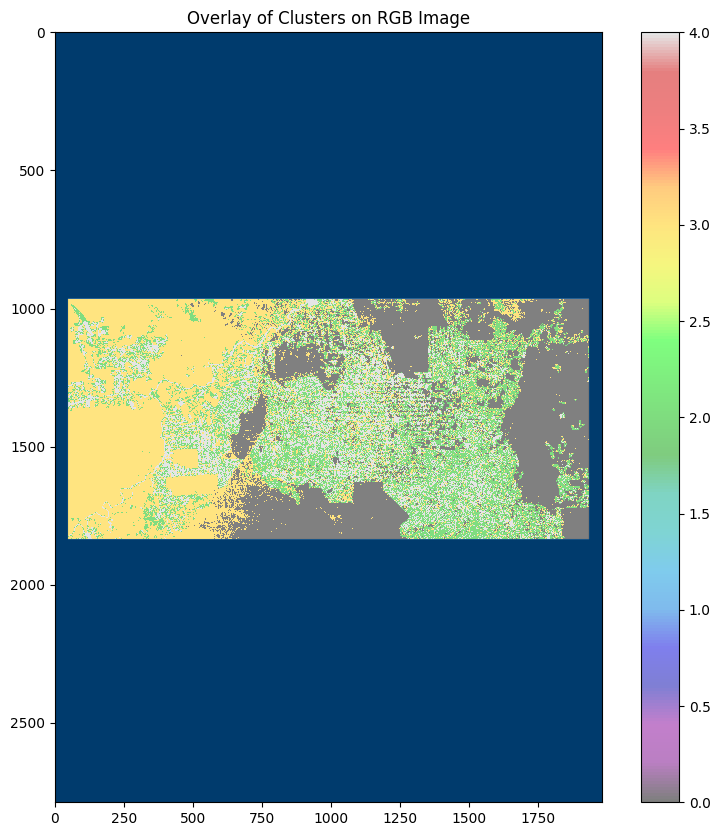

In [47]:
plt.figure(figsize=(10, 10))
plt.imshow(image.transpose(1, 2, 0))  # Original RGB image
plt.imshow(labels, alpha=0.5, cmap='nipy_spectral', interpolation='nearest')  # Cluster overlay
plt.title('Overlay of Clusters on RGB Image')
plt.colorbar()
plt.show()